# CIFAR-10 Dataset Image Classification using CNN

[Dataset on kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar10-python-in-csv)

## Contents
* Data Preprocessing
* Modeling
* Model Improving
* Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
sns.set(font_scale=1.3)

Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

Show a sample

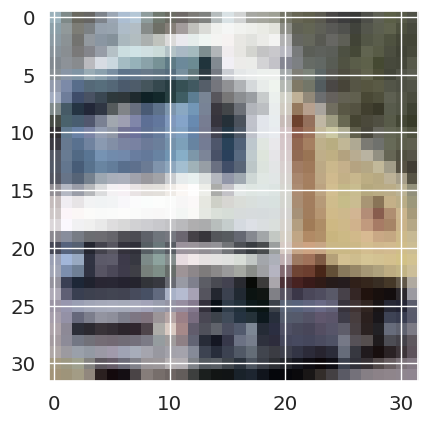

In [7]:
plt.imshow(X_train[1])
plt.show()

### Data Preprocessing
* Scaling
* Encoding

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

### Modeling

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

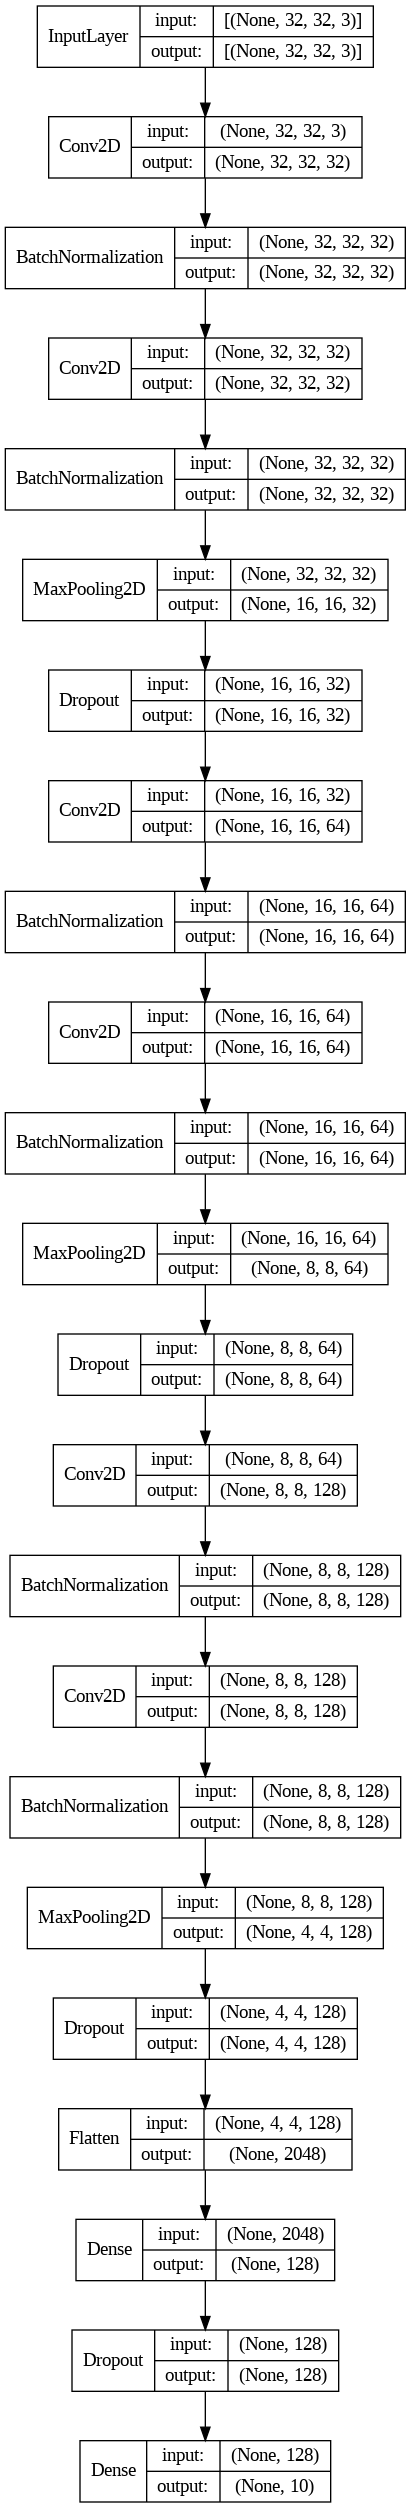

In [13]:
plot_model(model, show_shapes=True, show_layer_names=False)

### Model Improving
* Early stopping
* Data augmentation

In [14]:
es = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

Training our model

In [17]:
history = model.fit(train_generator, epochs=50, steps_per_epoch=steps_per_epoch, validation_data=(X_test, y_cat_test),
                    callbacks=[es], batch_size=batch_size)

Epoch 1/50
1562/1562 [==============================] - 631s 398ms/step - loss: 1.6367 - accuracy: 0.4071 - precision: 0.6197 - recall: 0.1956 - val_loss: 1.4641 - val_accuracy: 0.5093 - val_precision: 0.6372 - val_recall: 0.3933
Epoch 2/50
1562/1562 [==============================] - 571s 365ms/step - loss: 1.2373 - accuracy: 0.5601 - precision: 0.7215 - recall: 0.3938 - val_loss: 1.1690 - val_accuracy: 0.6037 - val_precision: 0.7409 - val_recall: 0.4787
Epoch 3/50
1562/1562 [==============================] - 583s 373ms/step - loss: 1.0382 - accuracy: 0.6398 - precision: 0.7725 - recall: 0.5088 - val_loss: 0.8776 - val_accuracy: 0.6915 - val_precision: 0.7762 - val_recall: 0.6070
Epoch 4/50
1562/1562 [==============================] - 577s 370ms/step - loss: 0.9285 - accuracy: 0.6815 - precision: 0.7943 - recall: 0.5684 - val_loss: 1.0713 - val_accuracy: 0.6493 - val_precision: 0.7371 - val_recall: 0.5720
Epoch 5/50
1562/1562 [==============================] - 581s 372ms/step - loss: 

### Evaluation
* Plotting
* Classification report
* Confusion matrix

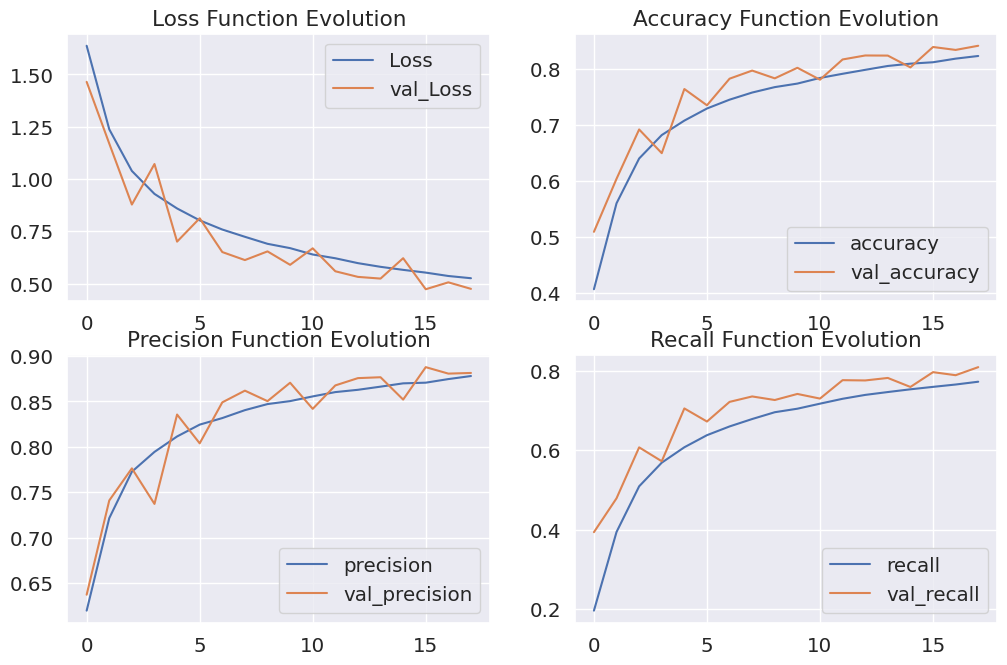

In [20]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

plt.show()

In [21]:
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)

313/313 [==============================] - 24s 77ms/step


In [22]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.92      0.94      0.93      1000
           2       0.79      0.74      0.76      1000
           3       0.67      0.75      0.71      1000
           4       0.91      0.74      0.81      1000
           5       0.82      0.73      0.77      1000
           6       0.74      0.95      0.83      1000
           7       0.89      0.87      0.88      1000
           8       0.95      0.90      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



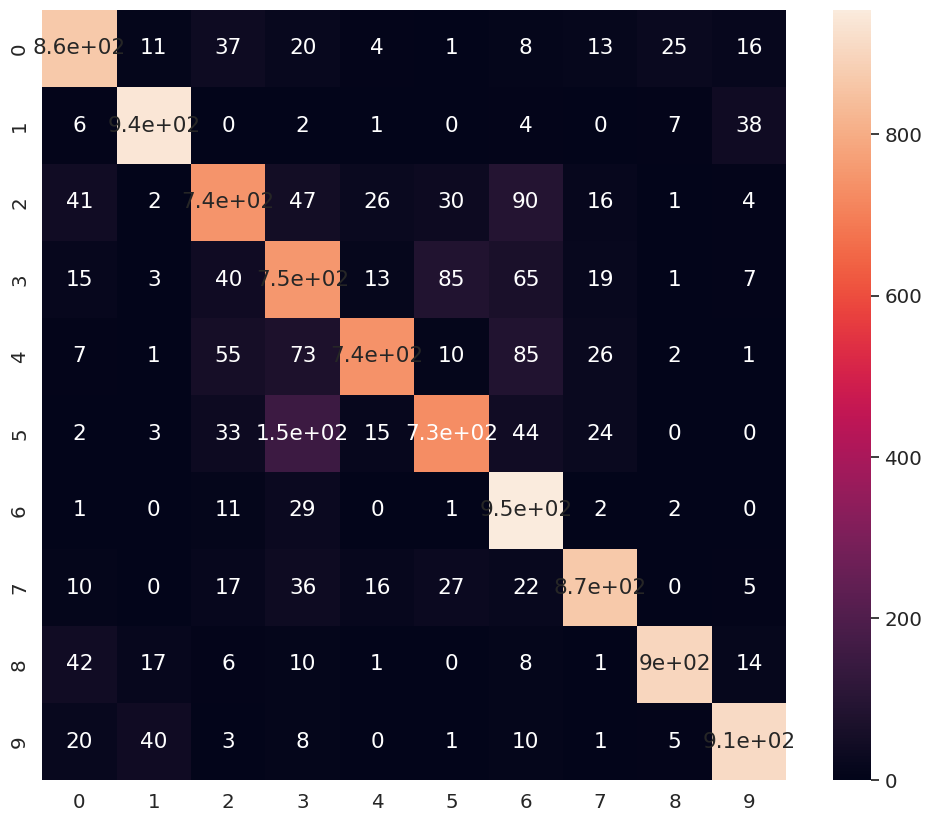

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, classes_x), annot=True)
plt.show()